#                       TEXT CLEANING

## Step 1. Look at the data
Look into the text for therein resides a world of data to be analysed and cleaned before using it for training. In text data, the usual check is done for :
* Spelling mistakes
* Commas(,), Apostrophes('), Quotes(""), Question Marks(?), etc.,
* Stopwords ie words that connect two sentences and such.

## Step 2. Normalize Whitespace, Punctuation, Case

### 2.1 MANUAL

#### 2.1.1 Load Data

In [1]:
filename = 'metamor.txt'
file = open(filename,'rt')
text = file.read()
file.close()

#### 2.1.2 Tokenization

##### Split by Whitespace

In [2]:
words1 = text.split()
print(words1[0:5])

['One', 'morning,', 'when', 'Gregor', 'Samsa']


##### Split by Words

In [3]:
import re
words2 = re.split(r'\W+',text)
print(words2[0:5])

['One', 'morning', 'when', 'Gregor', 'Samsa']


##### Remove Punctuations

In [4]:
import string

words3 = text.split()
table = str.maketrans('','',string.punctuation)
stripped = [w.translate(table) for w in words3]
print(words3[0:5])
print(stripped[0:5])

['One', 'morning,', 'when', 'Gregor', 'Samsa']
['One', 'morning', 'when', 'Gregor', 'Samsa']


#### 2.1.3 Capitalization

In [5]:
words4 = text.split()
words4 = [word.lower() for word in words4]
print(words4[0:5])

['one', 'morning,', 'when', 'gregor', 'samsa']


### 2.2 NLTK

#### 2.2.1 Load Data

In [6]:
filename = 'metamor.txt'
file = open(filename,'rt')
text = file.read()
file.close()

##### Split by Words

In [7]:
from nltk.tokenize import word_tokenize
tokens1 = word_tokenize(text)
print(tokens1[0:5])

['One', 'morning', ',', 'when', 'Gregor']


##### Split by Sentences

In [8]:
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[0:2])

['One morning, when Gregor Samsa woke from troubled dreams, he found\nhimself transformed in his bed into a horrible vermin.', 'He lay on\nhis armour-like back, and if he lifted his head a little he could\nsee his brown belly, slightly domed and divided by arches into stiff\nsections.']


#### 2.2.3 Filtering Punctuation

In [9]:
from nltk.tokenize import word_tokenize
tokens2 = word_tokenize(text)
words = [word for word in tokens2 if word.isalpha()]
print(words[0:5])

['One', 'morning', 'when', 'Gregor', 'Samsa']


## Step 3. Stopwords/Stemming

## 3.1 Filter out Stopwords and Pipelines

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 3.1.1 Load Data

In [11]:
filename = 'metamor.txt'
file = open(filename,'rt')
text = file.read()
file.close()

### 3.1.2 Stopwords removal using nltk.corpus()

In [12]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
tokens = [w.lower() for w in tokens]

import string
table = str.maketrans('','',string.punctuation)
stripped = [w.translate(table) for w in tokens]

words = [word for word in stripped if word.isalpha()]

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[0:5])

['one', 'morning', 'gregor', 'samsa', 'woke']


## 3.2 Filter out Stemming (Eg. University -> Univers)

### 3.2.1 Load Data

In [13]:
filename = 'metamor.txt'
file = open(filename,'rt')
text = file.read()
file.close()

### 3.2.2 Stem Data


In [14]:
from nltk.tokenize import word_tokenize
tokens2 = word_tokenize(text)

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[0:5])

['one', 'morn', ',', 'when', 'gregor']


### 3.2.3 Strip => Stem

In [15]:
from nltk.tokenize import word_tokenize
tokens3 = word_tokenize(text)

import string
table = str.maketrans('','',string.punctuation)
stripped = [w.translate(table) for w in tokens3]

words = [word for word in stripped if word.isalpha()]
print(words[0:10])

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemwords = [porter.stem(word) for word in tokens if word !=',']
print(stemwords[0:10])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he']
['one', 'morn', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', 'he']


## Step 4. Other Tools


### 1.Lemmatization
   Lemmatization is used to remove inflection. Using WordNet's lexical database of English, it yields better results.

### 2.Word Embedding/Text Vectors
Words are represented as high dimensionality vectors to make related words 'close together' in a high dimensional space. Word2Vec and GloVe are the most common models for converting word to vectors.

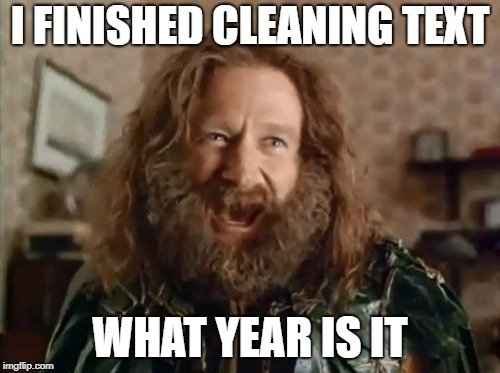